## 逻辑回归(Logical Regression)
逻辑回归是用来做分类算法的，线性回归是用来做预测的，取值范围[-∞, +∞]。而此时如果使用分类的话则需要将y的结果带入非线性变化sigmoid函数。
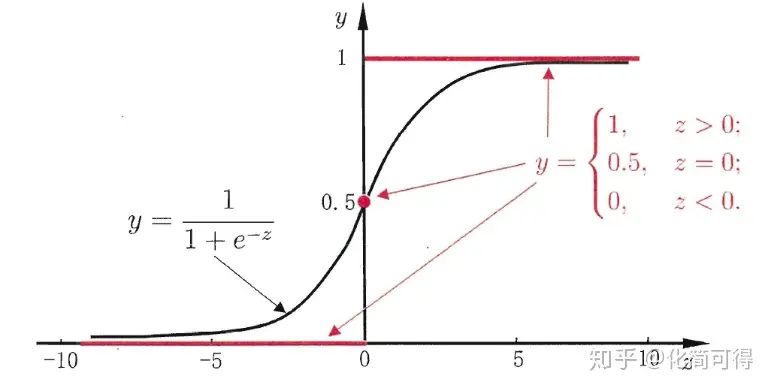

sigmoid函数定义 $S(x) = \frac {1} {1 + e^{-x}}$

函数中无论x取什么值，结果范围都是在[0, 1]之间，假如将分类阈值定为0.5，则超过0.5的为1分类，低于0.5的为0类。

对于逻辑回归类的损失函数为:
$$
L(h_{\theta}(x), y)=
\begin{cases}
-log(h_{\theta}(x)) & \text{if y = 1}\\
-log(1 - h_{\theta}(x)) & \text{if y = 0}
\end{cases}
$$

对于更通用一点的

### 如何使用二分类进行多分类？
将二分类问题变为多分类任务(one vs rest), 有如下思路。
1. 将类型class 1 看做是正样本，其他类型看做是负样本，然后就得到样本标记类型为该类型的概率p1
2. 然后将class 2 看做是正样本，重复上述操作。
3. 最终得到关于class i的 pi概率，从pi中选择最大的概率作为预测的最终样本类型。

### 逻辑回归的优点：
- LR能够以概率的形式输出结果，而非0,1判定
- LR的可解释性强，可控制度高
- 训练快
- 结果概率，可以做ranking model

逻辑回归的应用：
- CTR预估/推荐系统的learning to rank/各种分类场景

### 逻辑回归常用的优化方法有哪些

#### 一阶方法
梯度下降、随机梯度下降、mini随机梯度下降法，随机梯度下降不但速度上比原始梯度下降快，局部最优化问题时可以一定程度上抑制局部最优解的发生。
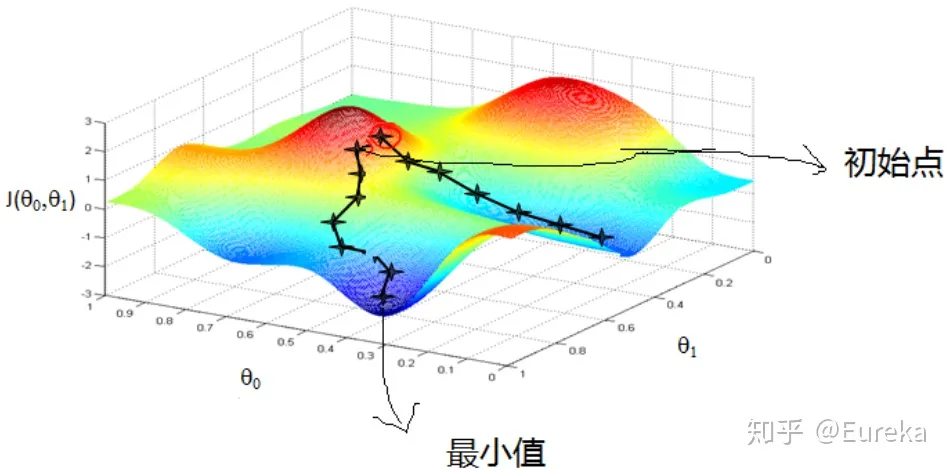
梯度下降不一定能够找到全局的最优解，有可能是一个局部最优解。当然，如果损失函数是凸函数，梯度下降法得到的解就一定是全局最优解。


#### 二阶方法：牛顿法、拟牛顿法
这里详细说一下牛顿法的基本原理和牛顿法的应用方式。牛顿法其实就是通过切线与x轴的交点不断更新切线的位置，直到达到曲线与x轴的交点得到方程解。在实际应用中我们因为常常要求解凸优化问题，也就是要求解函数一阶导数为0的位置，而牛顿法恰好可以给这种问题提供解决方法。实际应用中牛顿法首先选择一个点作为起始点，并进行一次二阶泰勒展开得到导数为0的点进行一个更新，直到达到要求，这时牛顿法也就成了二阶求解问题，比一阶方法更快。我们常常看到的x通常为一个多维向量，这也就引出了Hessian矩阵的概念（就是x的二阶导数矩阵）。

缺点：牛顿法是定长迭代，没有步长因子，所以不能保证函数值稳定的下降，严重时甚至会失败。还有就是牛顿法要求函数一定是二阶可导的。而且计算Hessian矩阵的逆复杂度很大。

拟牛顿法： 不用二阶偏导而是构造出Hessian矩阵的近似正定对称矩阵的方法称为拟牛顿法。拟牛顿法的思路就是用一个特别的表达形式来模拟Hessian矩阵或者是他的逆使得表达式满足拟牛顿条件。主要有DFP法（逼近Hession的逆）、BFGS（直接逼近Hession矩阵）、 L-BFGS（可以减少BFGS所需的存储空间）。

[梯度下降法、牛顿法和拟牛顿法](https://zhuanlan.zhihu.com/p/37524275)




In [55]:
import pandas as pd
import numpy as np
import random
from sklearn import model_selection
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)

set_seed(42)

pd.set_option("display.max_columns", 50)
'''
variable name
SeriousDlqin2yrs                        严重逾期
RevolvingUtilizationOfUnsecuredLines    余额
age                                     借贷人年龄
NumberOfTime30-59DaysPastDueNotWorse    30-50天内履约次数
DebtRatio                               月度贷款消费比例
MonthlyIncome                           月收入
NumberOfOpenCreditLinesAndLoans         有效贷款
NumberOfTimes90DaysLate                 90天内逾期次数
NumberRealEstateLoansOrLines            借贷次数
NumberOfTime60-89DaysPastDueNotWorse    60-89天内履约次数
NumberOfDependents                      家庭成员个数
'''


credits = pd.read_csv("./data/KaggleCredit2.csv", index_col=0)
print(credits.isnull().sum(axis=0))
credits.dropna(inplace=True)

credits_values = credits.values
print(credits.columns, credits_values.shape)

train_data = credits_values[:, 1:]
target_data = credits_values[:, 0]

# print(target_data)
print(np.mean(target_data))
# print(credits_value)
# print(credits_value[:10, :])


X_train, X_test, Y_train, Y_test = model_selection.train_test_split(train_data, target_data, test_size=0.2)

print(X_train.shape, X_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(multi_class="ovr", solver="sag", class_weight="balanced")
lr.fit(X_train, Y_train)
score = lr.score(X_train, Y_train)
print(score)

train_score = accuracy_score(Y_train, lr.predict(X_train))
test_score = accuracy_score(Y_test, lr.predict(X_test))
print(train_score, test_score)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64
Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object') (108648, 11)
0.06742876076872101
(86918, 10) (21730, 10)
0.9327757196438022
0.9327757196438022 0.9316612977450529


/root/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
